In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
raw_csv_data = pd.read_csv("/Users/sunwen/Desktop/JR_PCM_Entitlement_INV_BO_Analytics_UCLA.csv")

# raw_csv_data = pd.read_csv("C:/data/JR_PCM_Entitlement_INV_BO_Analytics_UCLA.csv"

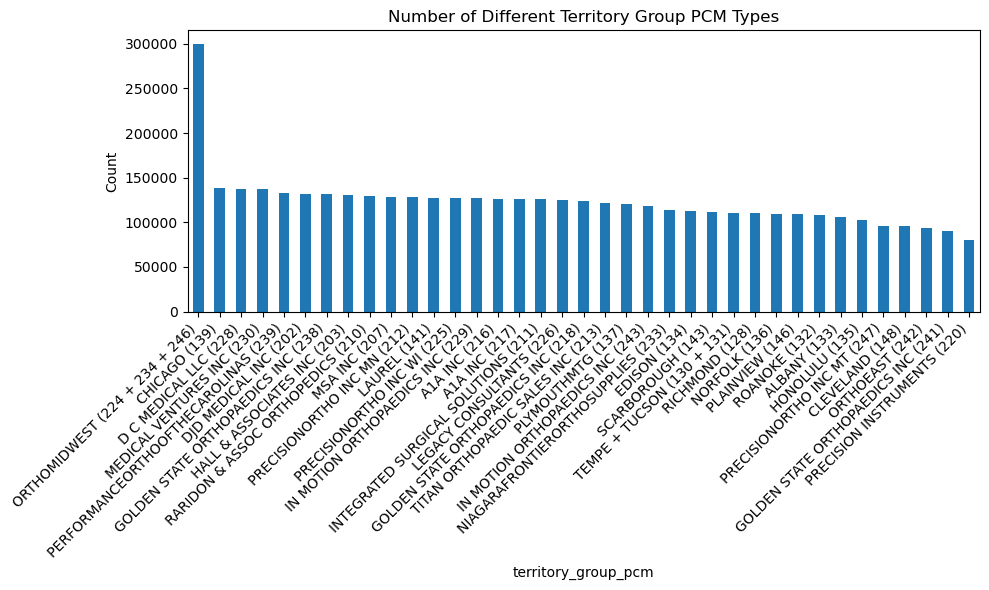

In [3]:
territory_counts = raw_csv_data['territory_group_pcm'].value_counts()

# Create a bar chart
plt.figure(figsize = (10, 6))
territory_counts.plot(kind = 'bar')
plt.xlabel('territory_group_pcm')
plt.ylabel('Count')
plt.title('Number of Different Territory Group PCM Types')
plt.xticks(rotation = 45, ha = 'right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
#unique territory types
unique_territory_count = raw_csv_data['territory_group_pcm'].nunique()
print(f"Number of unique territory_group_pcm counts: {unique_territory_count}")

Number of unique territory_group_pcm counts: 37


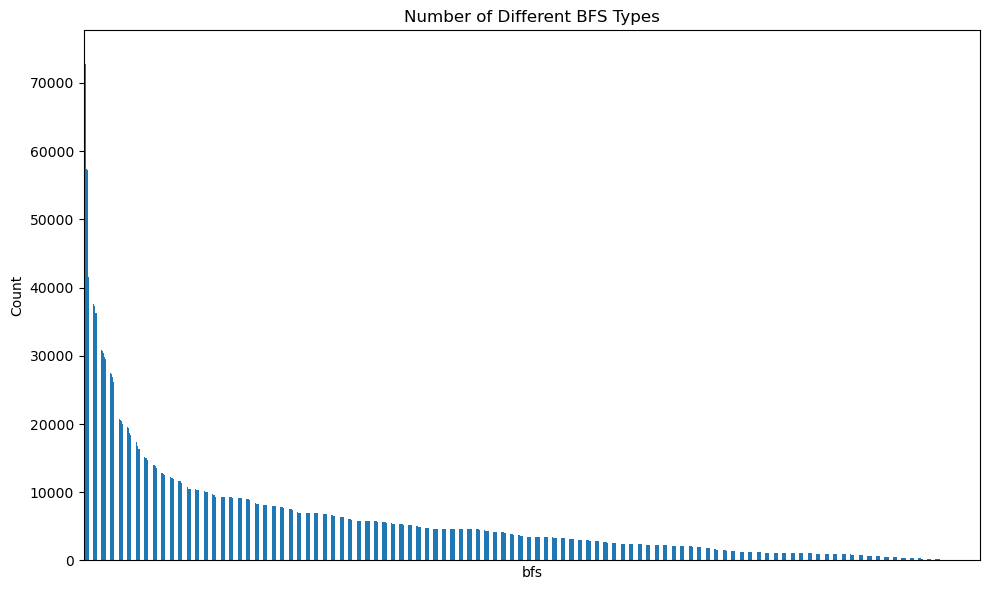

In [5]:
# Count the occurrences of each bfs
bfs_counts = raw_csv_data['bfs'].value_counts()

# Create a vertical bar chart
plt.figure(figsize = (10, 6))
bfs_counts.plot(kind = 'bar')
plt.xlabel('bfs')
plt.ylabel('Count')
plt.title('Number of Different BFS Types')

# Remove x-axis labels
plt.xticks([])

plt.tight_layout()

# Show the plot
plt.show()

In [6]:
#unique bfs types number
unique_bfs_count = raw_csv_data['bfs'].nunique()
print(f"Number of unique BFS counts: {unique_bfs_count}")

Number of unique BFS counts: 791


In [7]:
#delete useless columns
cols = ['Product Line', 'Left / Right', 'Capture Date', 'Parent','P2 Parent Description','office_name', 'bfs_description', 'case_type', 'procedure_type', 'territory_group_to_display_together', 'rag_color_code', 'color_coding_new']
cleaned_csv_data = raw_csv_data.drop(cols, axis = 1)

In [8]:
cleaned_csv_data.head()

,NTS_Units,Orders on Territory,Orders on DC,Grouped_Territory_Set_Count,Size,Component Type,Instument / Implant,Brand,Week#,Month,...,excess_layers_vs_pcm_ter,layers_below_pcm_ter_pivot,excess_layers_vs_pcm_ter_pivot,sku_below_pcm_due_to_bo_units,sku_excess_vs_pcm_units,bfs_sales_units,weekly_sales_units,weekly_bfs_sales_units,weeks_of_supply_w_bfs_sales,area_name
0,0,0,0,0,129416712,Other Non Focus,IMPLANT,LCS,13,3,...,0,0,0,0,2,3,0.000000,0.057692,34.666670,Northeast
1,0,0,1,2,32IDX74OD,Liner,IMPLANT,PINNACLE,14,4,...,2,0,0,0,2,0,0.000000,0.000000,10.000000,North Atlantic
2,0,0,0,0,197731240,Other Non Focus,IMPLANT,RECLAIM,27,7,...,0,0,0,1,0,11,0.000000,0.211538,9.454545,West
3,1,0,0,0,8,Stem,IMPLANT,CORAIL,30,7,...,0,0,0,0,0,1,0.019231,0.019231,52.000000,North Atlantic
4,0,0,0,0,Z 5 12MM,Tibial Tray,IMPLANT,ATTUNE,28,7,...,0,0,0,0,1,0,0.000000,0.000000,10.000000,West


In [9]:
#separate core and outlier data
core_data = cleaned_csv_data[cleaned_csv_data['core_size'] == 'Core']
outlier_data = cleaned_csv_data[cleaned_csv_data['core_size'] == 'Outlier']

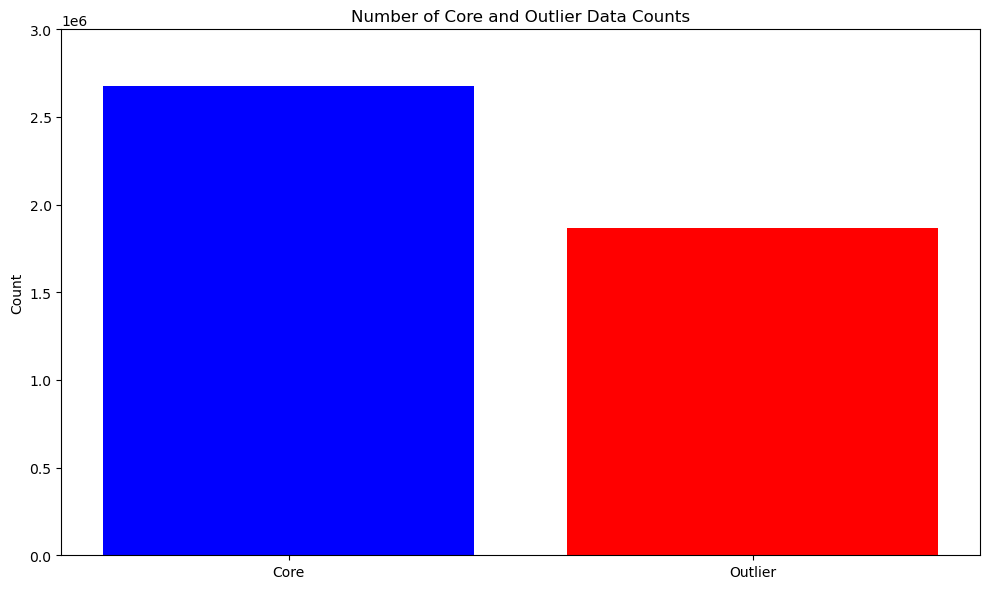

In [10]:
core_data_count = core_data.shape[0]
outlier_data_count = outlier_data.shape[0]

# Create a vertical bar chart
plt.figure(figsize = (10, 6))
plt.bar(['Core', 'Outlier'], [core_data_count, outlier_data_count], color = ['blue', 'red'])
plt.ylabel('Count')
plt.title('Number of Core and Outlier Data Counts')

plt.tight_layout()
plt.ylim(0, 3e6)

# Show the plot
plt.show()

In [11]:
core_data_territory_simple = core_data[['Size', 'Brand', 'Component Type', 'territory_group_pcm', 'Week#', 'Month', 'bfs', 'layers_pivot', 'layers_left_pivot', 'layers_down_pivot', 'item_description', 'sales_units', 'weekly_bfs_sales_units', 'inventory_total_units', 'backorder_units', 'total_units', 'base_sets', 'layers', 'pcm_entitled_full_2nd_max_layers', 'pcm_entitled_full_by_sku_units', 'pcm_entitled_full_2nd_max_layers_pivot', 'weeks_of_supply_w_bfs_sales', 'area_name']]
outlier_data_territory_simple = outlier_data[['Size', 'Brand', 'Component Type', 'territory_group_pcm', 'Week#', 'Month', 'bfs', 'layers_pivot', 'layers_left_pivot', 'layers_down_pivot', 'item_description', 'sales_units', 'weekly_bfs_sales_units', 'inventory_total_units', 'backorder_units', 'total_units', 'base_sets', 'layers', 'pcm_entitled_full_2nd_max_layers', 'pcm_entitled_full_by_sku_units', 'pcm_entitled_full_2nd_max_layers_pivot', 'weeks_of_supply_w_bfs_sales', 'area_name']]

In [12]:
core_data_territory_simple.head()

,Size,Brand,Component Type,territory_group_pcm,Week#,Month,bfs,layers_pivot,layers_left_pivot,layers_down_pivot,...,inventory_total_units,backorder_units,total_units,base_sets,layers,pcm_entitled_full_2nd_max_layers,pcm_entitled_full_by_sku_units,pcm_entitled_full_2nd_max_layers_pivot,weeks_of_supply_w_bfs_sales,area_name
4,Z 5 12MM,ATTUNE,Tibial Tray,HONOLULU (135),28,7,MB/AC/A - NA - Core,0,0,0,...,1,0,1,0,0,0,0,0,10.0,West
5,520048195,INHANCE,Other Non Focus,NORFOLK (136),31,8,O/BX/AD - NA - Core,0,0,0,...,8,0,8,1,8,0,0,0,10.0,North Atlantic
9,129456136,MBT,Other Non Focus,HONOLULU (135),13,3,M/AB/G - NA - Core,0,0,0,...,2,0,2,1,2,5,5,0,52.0,West
11,129405517,LCS,Other Non Focus,A1A INC (216),1,1,M/AA/BA - NA - Core,0,0,0,...,2,0,2,1,2,0,0,0,52.0,West
14,16,CORAIL,Stem,PRECISIONORTHO INC MT (247),13,3,A/HA/DA 135 HIGH OFF COLLAR - NA - Core,0,0,0,...,3,0,3,2,3,1,1,0,78.0,North Central


In [13]:
core_data_territory_simple['territory_group_pcm'].nunique()

37

In [14]:
territory_idx = pd.DataFrame(core_data_territory_simple['territory_group_pcm'])
for i in range(len(territory_idx)):
    idx1 = territory_idx.iloc[i]['territory_group_pcm'].index('(')
    idx2 = territory_idx.iloc[i]['territory_group_pcm'].index(')')
    if idx2 - idx1 == 4:
        temp = int(territory_idx.iloc[i]['territory_group_pcm'][idx1 + 1: idx2])
    elif idx2 - idx1 == 10:
        num1 = int(territory_idx.iloc[i]['territory_group_pcm'][idx1 + 1: idx1 + 4])
        num2 = int(territory_idx.iloc[i]['territory_group_pcm'][idx2 - 3: idx2])
        temp = num1 + num2
    else:
        num1 = int(territory_idx.iloc[i]['territory_group_pcm'][idx1 + 1: idx1 + 4])
        num2 = int(territory_idx.iloc[i]['territory_group_pcm'][idx1 + 7: idx2 - 6])
        num3 = int(territory_idx.iloc[i]['territory_group_pcm'][idx2 - 3: idx2])
        temp = num1 + num2 + num3
    territory_idx.iloc[i]['territory_group_pcm'] = temp
core_data_territory_simple['territory'] = territory_idx

/var/folders/ym/260cb48n12lc3mdfj9_b7fzm0000gn/T/ipykernel_1155/3723821969.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_data_territory_simple['territory'] = territory_idx


In [15]:
core_data_territory_simple.head()

,Size,Brand,Component Type,territory_group_pcm,Week#,Month,bfs,layers_pivot,layers_left_pivot,layers_down_pivot,...,backorder_units,total_units,base_sets,layers,pcm_entitled_full_2nd_max_layers,pcm_entitled_full_by_sku_units,pcm_entitled_full_2nd_max_layers_pivot,weeks_of_supply_w_bfs_sales,area_name,territory
4,Z 5 12MM,ATTUNE,Tibial Tray,HONOLULU (135),28,7,MB/AC/A - NA - Core,0,0,0,...,0,1,0,0,0,0,0,10.0,West,135
5,520048195,INHANCE,Other Non Focus,NORFOLK (136),31,8,O/BX/AD - NA - Core,0,0,0,...,0,8,1,8,0,0,0,10.0,North Atlantic,136
9,129456136,MBT,Other Non Focus,HONOLULU (135),13,3,M/AB/G - NA - Core,0,0,0,...,0,2,1,2,5,5,0,52.0,West,135
11,129405517,LCS,Other Non Focus,A1A INC (216),1,1,M/AA/BA - NA - Core,0,0,0,...,0,2,1,2,0,0,0,52.0,West,216
14,16,CORAIL,Stem,PRECISIONORTHO INC MT (247),13,3,A/HA/DA 135 HIGH OFF COLLAR - NA - Core,0,0,0,...,0,3,2,3,1,1,0,78.0,North Central,247


In [16]:
#display deployed sets
deployed_sets_all = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['layers_pivot'].max().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(deployed_sets_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [17]:
#display available sets
available_sets_all = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['layers_left_pivot'].max().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(available_sets_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [18]:
#display entitled sets
entitled_sets_all = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['pcm_entitled_full_2nd_max_layers_pivot'].max().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(entitled_sets_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
inventory_total_units = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['inventory_total_units'].sum().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(inventory_total_units)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [20]:
sales_total_units = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['sales_units'].sum().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(sales_total_units)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
core_data_territory_simple['weekly_supply_bfs_sales'] = core_data_territory_simple['weeks_of_supply_w_bfs_sales']
core_data_territory_simple['weekly_supply_bfs_sales'] = core_data_territory_simple['weekly_supply_bfs_sales'].round().astype(int)
weekly_bfs_sales = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys = True)['weekly_supply_bfs_sales'].sum().to_frame()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(weekly_bfs_sales)

/var/folders/ym/260cb48n12lc3mdfj9_b7fzm0000gn/T/ipykernel_1155/2466651659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_data_territory_simple['weekly_supply_bfs_sales'] = core_data_territory_simple['weeks_of_supply_w_bfs_sales']
/var/folders/ym/260cb48n12lc3mdfj9_b7fzm0000gn/T/ipykernel_1155/2466651659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_data_territory_simple['weekly_supply_bfs_sales'] = core_data_territory_simple['weekly_supply_bfs_sales'].round().astype(int)
IOPub data rat

In [22]:
# Combine the columns from the three DataFrames
combined_df = pd.concat([deployed_sets_all, available_sets_all, entitled_sets_all, sales_total_units, weekly_bfs_sales], axis = 1)

combined_df['area'] = core_data_territory_simple.groupby(['territory', 'Week#', 'bfs'], group_keys=True)['area_name'].first().values

# Only keep unique columns
combined_df_unique = combined_df.loc[:, ~combined_df.columns.duplicated()]

# Print the updated combined DataFrame
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3):
    print(combined_df_unique)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
combined_df_without_area = pd.concat([deployed_sets_all, available_sets_all, entitled_sets_all, sales_total_units, weekly_bfs_sales], axis = 1)
combined_df_without_area_unique = combined_df_without_area.loc[:, ~combined_df_without_area.columns.duplicated()]
combined_df_without_area_unique.head()

layers_pivot  layers_left_pivot  \
territory Week# bfs                                                   
128       1     A/B/K - NA - Core              5                  5   
                A/B/L - NA - Core              6                  6   
                A/G/AA - NA - Core            22                 20   
                A/G/AB - NA - Core            18                 18   
                A/G/AC - NA - Core             6                  6   

                                    pcm_entitled_full_2nd_max_layers_pivot  \
territory Week# bfs                                                          
128       1     A/B/K - NA - Core                                        6   
                A/B/L - NA - Core                                        8   
                A/G/AA - NA - Core                                      21   
                A/G/AB - NA - Core                                      19   
                A/G/AC - NA - Core                                       4   

                                    sales_units  weekly_supply_bfs_sales  
territory Week# bfs                                                       
128       1     A/B/K - NA - Core            33                       81  
                A/B/L - NA - Core            40                       64  
                A/G/AA - NA - Core          193                       33  
                A/G/AB - NA - Core          209                       25  
                A/G/AC - NA - Core           18                       90

In [24]:
#try to change variables into numerical values:

# Get unique area values and their corresponding numerical codes
area_codes, area_labels = pd.factorize(combined_df_unique['area'])

# Add a new column "area_code" with the numerical codes
combined_df_unique['area_code'] = area_codes

combined_df_unique.head(10)

layers_pivot  layers_left_pivot  \
territory Week# bfs                                                   
128       1     A/B/K - NA - Core              5                  5   
                A/B/L - NA - Core              6                  6   
                A/G/AA - NA - Core            22                 20   
                A/G/AB - NA - Core            18                 18   
                A/G/AC - NA - Core             6                  6   
                A/G/AD - NA - Core             5                  5   
                A/G/AE - NA - Core            16                 16   
                A/G/AF - NA - Core            15                 15   
                A/G/AG - NA - Core            10                 10   
                A/G/AH - NA - Core             9                  9   

                                    pcm_entitled_full_2nd_max_layers_pivot  \
territory Week# bfs                                                          
128       1     A/B/K - NA - Core                                        6   
                A/B/L - NA - Core                                        8   
                A/G/AA - NA - Core                                      21   
                A/G/AB - NA - Core                                      19   
                A/G/AC - NA - Core                                       4   
                A/G/AD - NA - Core                                       4   
                A/G/AE - NA - Core                                      16   
                A/G/AF - NA - Core                                      12   
                A/G/AG - NA - Core                                      11   
                A/G/AH - NA - Core                                      10   

                                    sales_units  weekly_supply_bfs_sales  \
territory Week# bfs                                                        
128       1     A/B/K - NA - Core            33                       81   
                A/B/L - NA - Core            40                       64   
                A/G/AA - NA - Core          193                       33   
                A/G/AB - NA - Core          209                       25   
                A/G/AC - NA - Core           18                       90   
                A/G/AD - NA - Core           21                       75   
                A/G/AE - NA - Core           66                       61   
                A/G/AF - NA - Core           41                       95   
                A/G/AG - NA - Core           66                       31   
                A/G/AH - NA - Core           35                       57   

                                              area  area_code  
territory Week# bfs                                            
128       1     A/B/K - NA - Core   North Atlantic          0  
                A/B/L - NA - Core   North Atlantic          0  
                A/G/AA - NA - Core  North Atlantic          0  
                A/G/AB - NA - Core  North Atlantic          0  
                A/G/AC - NA - Core  North Atlantic          0  
                A/G/AD - NA - Core  North Atlantic          0  
                A/G/AE - NA - Core  North Atlantic          0  
                A/G/AF - NA - Core  North Atlantic          0  
                A/G/AG - NA - Core  North Atlantic          0  
                A/G/AH - NA - Core  North Atlantic          0

In [25]:
combined_df_all_unique = pd.concat([combined_df_unique, inventory_total_units], axis = 1)
combined_df_all_unique = combined_df_all_unique.loc[:, ~combined_df_all_unique.columns.duplicated()]
combined_df_all_unique.head()

layers_pivot  layers_left_pivot  \
territory Week# bfs                                                   
128       1     A/B/K - NA - Core              5                  5   
                A/B/L - NA - Core              6                  6   
                A/G/AA - NA - Core            22                 20   
                A/G/AB - NA - Core            18                 18   
                A/G/AC - NA - Core             6                  6   

                                    pcm_entitled_full_2nd_max_layers_pivot  \
territory Week# bfs                                                          
128       1     A/B/K - NA - Core                                        6   
                A/B/L - NA - Core                                        8   
                A/G/AA - NA - Core                                      21   
                A/G/AB - NA - Core                                      19   
                A/G/AC - NA - Core                                       4   

                                    sales_units  weekly_supply_bfs_sales  \
territory Week# bfs                                                        
128       1     A/B/K - NA - Core            33                       81   
                A/B/L - NA - Core            40                       64   
                A/G/AA - NA - Core          193                       33   
                A/G/AB - NA - Core          209                       25   
                A/G/AC - NA - Core           18                       90   

                                              area  area_code  \
territory Week# bfs                                             
128       1     A/B/K - NA - Core   North Atlantic          0   
                A/B/L - NA - Core   North Atlantic          0   
                A/G/AA - NA - Core  North Atlantic          0   
                A/G/AB - NA - Core  North Atlantic          0   
                A/G/AC - NA - Core  North Atlantic          0   

                                    inventory_total_units  
territory Week# bfs                                        
128       1     A/B/K - NA - Core                      53  
                A/B/L - NA - Core                      48  
                A/G/AA - NA - Core                    121  
                A/G/AB - NA - Core                    108  
                A/G/AC - NA - Core                     32

In [26]:
combined_df_all_without_area_unique = pd.concat([combined_df_without_area_unique, inventory_total_units], axis = 1)
combined_df_all_without_area_unique = combined_df_all_without_area_unique.loc[:, ~combined_df_all_without_area_unique.columns.duplicated()]
combined_df_all_without_area_unique.head()

layers_pivot  layers_left_pivot  \
territory Week# bfs                                                   
128       1     A/B/K - NA - Core              5                  5   
                A/B/L - NA - Core              6                  6   
                A/G/AA - NA - Core            22                 20   
                A/G/AB - NA - Core            18                 18   
                A/G/AC - NA - Core             6                  6   

                                    pcm_entitled_full_2nd_max_layers_pivot  \
territory Week# bfs                                                          
128       1     A/B/K - NA - Core                                        6   
                A/B/L - NA - Core                                        8   
                A/G/AA - NA - Core                                      21   
                A/G/AB - NA - Core                                      19   
                A/G/AC - NA - Core                                       4   

                                    sales_units  weekly_supply_bfs_sales  \
territory Week# bfs                                                        
128       1     A/B/K - NA - Core            33                       81   
                A/B/L - NA - Core            40                       64   
                A/G/AA - NA - Core          193                       33   
                A/G/AB - NA - Core          209                       25   
                A/G/AC - NA - Core           18                       90   

                                    inventory_total_units  
territory Week# bfs                                        
128       1     A/B/K - NA - Core                      53  
                A/B/L - NA - Core                      48  
                A/G/AA - NA - Core                    121  
                A/G/AB - NA - Core                    108  
                A/G/AC - NA - Core                     32

In [27]:
combined_df_unique.to_csv('combined_df_unique.csv', index = False)
combined_df_without_area_unique.to_csv('combined_df_without_area_unique.csv', index = False)
combined_df_all_unique.to_csv('combined_df_all_unique.csv', index = False)
combined_df_all_without_area_unique.to_csv('combined_df_all_without_area_unique.csv', index = False)

In [28]:
from sklearn.model_selection import cross_val_score, train_test_split
from keras.models import Sequential
from keras.layers import LSTM,Dense
import numpy as np
from tensorflow.keras.layers import Embedding, Flatten
import tensorflow as tf

In [29]:
from sklearn.preprocessing import OneHotEncoder
combined_df_all_unique = combined_df_all_unique.reset_index()

import numpy as np
from sklearn.preprocessing import LabelEncoder

# Assuming 'your_categorical_column' is the name of the column containing your categorical data
encoder = LabelEncoder()
combined_df_all_unique['bfs'] = encoder.fit_transform(combined_df_all_unique['bfs'])

# Convert the Series to a NumPy array and reshape it
combined_df_all_unique['bfs'] = combined_df_all_unique['bfs'].values.reshape(-1, 1)


In [30]:
train_out, test_out = train_test_split(combined_df_all_unique, test_size=0.1, random_state=42)
# train_out = train_out.reset_index()
# test_out = test_out.reset_index()

In [44]:
train_x = train_out[['territory','Week#','bfs', 'layers_pivot', 'layers_left_pivot', 'pcm_entitled_full_2nd_max_layers_pivot','weekly_supply_bfs_sales', "inventory_total_units", 'area_code']]
test_x = test_out[['territory','Week#', 'bfs', 'layers_pivot', 'layers_left_pivot', 'pcm_entitled_full_2nd_max_layers_pivot','weekly_supply_bfs_sales', "inventory_total_units",'area_code']]
train_y = train_out[['sales_units']]
test_y = test_out[['sales_units']]
train_x = np.reshape(np.array(train_x), (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(np.array(test_x), (test_x.shape[0], 1, test_x.shape[1]))

In [45]:
# print(train_x.shape)
# print(test_x.shape)
# train_x_reshaped = train_x.reshape(train_x.shape[0], 1, train_x.shape[2])
# test_x_reshaped = test_x.reshape(test_x.shape[0], 1, test_x.shape[2])

In [46]:
from sklearn.preprocessing import MinMaxScaler

# Flatten your 3D training data to 2D
train_x_2d = train_x.reshape(train_x.shape[0], -1)


# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on your flattened training data and transform it
train_x_normalized = scaler.fit_transform(train_x_2d)
# train_y_normalized = scaler.fit_transform(train_y)

# Flatten and transform your test/validation data using the same scaler
test_x_2d = test_x.reshape(test_x.shape[0], -1)
test_x_normalized = scaler.transform(test_x_2d)
# test_y_2d = test_y.reshape(test_y.shape[0], -1)
# test_y_normalized = scaler.transform(test_y_2d)
scaler_y = MinMaxScaler()
train_y_scaled = scaler_y.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = scaler_y.transform(test_y.values.reshape(-1, 1))

In [71]:
test_y.max()

sales_units    12213
dtype: int64

In [47]:
### LGBM

In [58]:
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
## df 
# df = pd.DataFrame(combined_df_all_unique.copy())
# df = df.reset_index()
# df['sales_units'] = df['bfs'].astype('category')

# # Assuming you have your processed DataFrame called combined_df_unique
# data = df.copy()

# # Define your input features and target variable
# target = 'inventory_total_units'

# # Split the data into input features (X) and target variable (y)
# X = data  # Exclude the last column (current inventory_total_units)
# y = data[target]

# # Split the data into training and validation sets
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the data for LightGBM
train_dataset = lgb.Dataset(train_x_normalized, label=train_y_scaled)
valid_dataset = lgb.Dataset(test_x_normalized, label=test_y_scaled, reference=train_dataset)

# Define the LightGBM parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',  # Root Mean Squared Error
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.0001,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0,
    'random_state': 42
}

# Train the LightGBM model
num_round = 1000  # You may need to adjust the number of boosting rounds
model = lgb.train(params, train_dataset, num_round, valid_sets=[valid_dataset])

# Make predictions on validation data
valid_preds = model.predict(test_x_normalized, num_iteration=model.best_iteration)

# Calculate RMSE on validation data
rmse = mean_squared_error(test_y_scaled, valid_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

# Now, you can use the trained model to make predictions on new data
# For example, you can use model.predict(new_data[features[:-1]]) to predict future inventory_total_units for new_data

# Save the trained model if needed
#model.save_model('lgbm_model.txt')

/Users/sunwen/anaconda3/lib/python3.10/site-packages/lightgbm/basic.py:179: UserWarning: Converting column-vector to 1d array
  _log_warning('Converting column-vector to 1d array')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[1]	valid_0's rmse: 0.0501008
[2]	valid_0's rmse: 0.0500962
[3]	valid_0's rmse: 0.0500916
[4]	valid_0's rmse: 0.050087
[5]	valid_0's rmse: 0.0500826
[6]	valid_0's rmse: 0.0500781
[7]	valid_0's rmse: 0.0500736
[8]	valid_0's rmse: 0.050069
[9]	valid_0's rmse: 0.0500644
[10]	valid_0's rmse: 0.05006
[11]	valid_0's rmse: 0.0500556
[12]	valid_0's rmse: 0.0500512
[13]	valid_0's rmse: 0.0500466
[14]	valid_0's rmse: 0.050042
[15]	valid_0's rmse: 0.0500374
[16]	valid_0's rmse: 0.0500328
[17]	valid_0's rmse: 0.0500283
[18]	valid_0's rmse: 0.0500237
[19]	valid_0's rmse: 0.0500191
[20]	valid_0's rmse: 0.0500145
[21]	valid_0's rmse: 0.05001
[22]	valid_0's rmse: 0.0500054
[23]	valid_0's rmse: 0.0500009
[24]	valid_0's rmse: 0.0499963
[25]	valid_0's rmse: 0.0499917
[26]	valid_0

In [59]:
# Calculate MAPE
def calculate_mape(y_true, y_pred):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape
test_y_scaled_lgbm = test_y_scaled+1
mape_lgbm = calculate_mape(test_y_scaled_lgbm, valid_preds)

# Convert MAPE to a float and then format it
formatted_mape = "{:.2f}".format(float(mape_lgbm))

print(f'Mean Absolute Percentage Error (MAPE): {formatted_mape}%')

Mean Absolute Percentage Error (MAPE): 98.63%


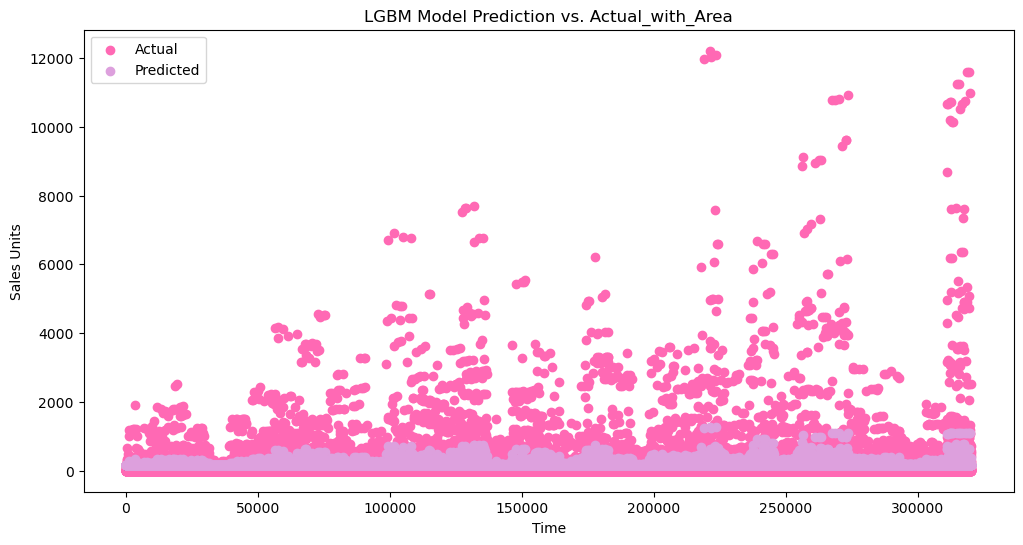

In [60]:
# Inverse scale the predictions to get the actual values
valid_preds = valid_preds.reshape(-1, 1)

predicted_y = scaler_y.inverse_transform(valid_preds)
# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(test_y.index, scaler_y.inverse_transform(test_y_scaled), label='Actual', c = 'hotpink')
plt.scatter(test_y.index, predicted_y, label='Predicted', c = 'plum')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sales Units')
plt.title('LGBM Model Prediction vs. Actual_with_Area')
plt.show()

In [69]:
max(scaler_y.inverse_transform(test_y_scaled))

array([12213.])

In [61]:
# Calculate RMSE on validation data
rmse = mean_squared_error(test_y_scaled, valid_preds, squared=False)
print(f"Validation RMSE: {rmse:.4f}")

Validation RMSE: 0.0458


In [39]:
## Linear Regression

In [62]:
# Import the necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(train_x_normalized, train_y_scaled)

# Make predictions on the test data
predictions = model.predict(test_x_normalized)

# Calculate the Mean Squared Error and R-squared for evaluation
mse = mean_squared_error(test_y_scaled, predictions)
r_squared = r2_score(test_y_scaled, predictions)

# Print the model coefficients and evaluation metrics
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

Coefficients: [[ 8.80559321e-03 -2.52742461e-04 -1.22873203e-03  7.95616963e-01
  -5.03080430e-01  5.63410186e-01 -4.89516928e-02  2.81636479e-01
  -9.98948519e-03]]
Intercept: [-0.00587346]
Mean Squared Error: 0.0006975888980000085
R-squared: 0.722130103520794


In [63]:
# Calculate RMSE on validation data
rmse_lr = mean_squared_error(test_y_scaled, predictions, squared=False)
print(f"Validation RMSE: {rmse_lr:.4f}")

Validation RMSE: 0.0264


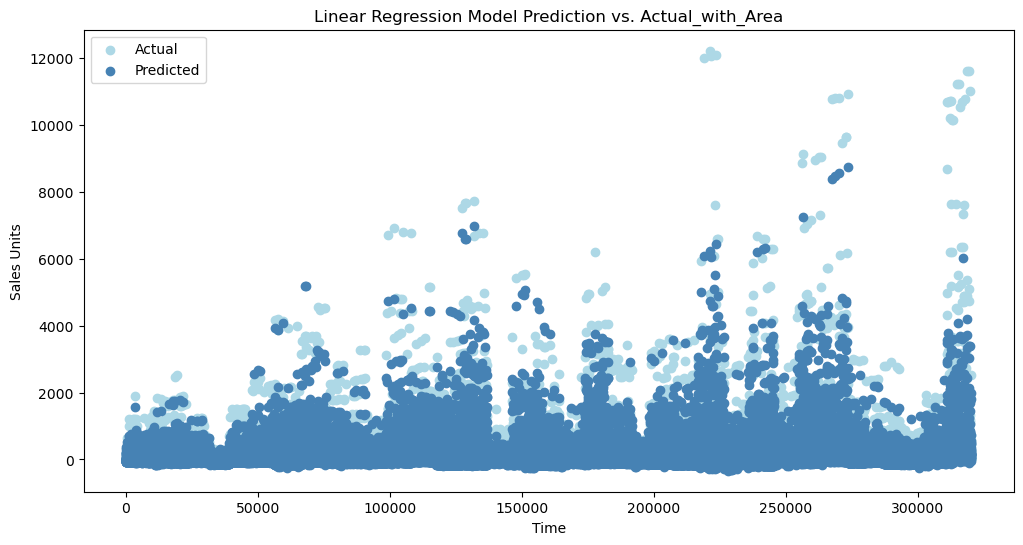

In [64]:
# Inverse scale the predictions to get the actual values
predicted_y = scaler_y.inverse_transform(predictions)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.scatter(test_y.index, scaler_y.inverse_transform(test_y_scaled), label='Actual', c = 'lightblue')
plt.scatter(test_y.index, predicted_y, label='Predicted', c = 'steelblue')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sales Units')
plt.title('Linear Regression Model Prediction vs. Actual_with_Area')
plt.show()


In [65]:
def calculate_mape(y_true, y_pred):
    absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
    mape = np.mean(absolute_percentage_error) * 100
    return mape
test_y_scaled_lr = test_y_scaled+1
mape_lgbm = calculate_mape(test_y_scaled_lr, valid_preds)

# Convert MAPE to a float and then format it
formatted_mape = "{:.2f}".format(float(mape_lgbm))

print(f'Mean Absolute Percentage Error (MAPE): {formatted_mape}%')

Mean Absolute Percentage Error (MAPE): 98.64%
